<a href="https://colab.research.google.com/github/mateandras0/DIPLOMAMUNKA/blob/main/HANGULATELEMZ%C3%89S_VIDE%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Szükséges könyvtárak alkalmazása

In [ ]:
import cv2 # OpenCv könyvtár importálása
import numpy as np # grafikonok megjelenítéséhez
import matplotlib.pyplot as plt # grafikonok megjelenítéséhez
import seaborn as sns # grafikonok megjelenítéséhez
from google.colab.patches import cv2_imshow # képek megjelenítéséhez
import zipfile # zip kicsomagoláshoz
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator #képek beolvasásához
from keras.models import Sequential # tensorflow neurális háló létrehozásához
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization #neurális hálózati rétegek kialakításához

Csatlakozás a Google Drive fiókomhoz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


zip fájlformátumú adathalmaz elérése és kicsomagolása

In [ ]:
path = '/content/drive/MyDrive/Diplomamunka/dataset.zip'
zip_file = zipfile.ZipFile(file=path, mode='r')
zip_file.extractall('./')
zip_file.close()

Tanuló adathalmaz kialakítása

In [ ]:
training_generator = ImageDataGenerator(1./255, rotation_range=7, horizontal_flip=True, zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/dataset/train', target_size=(48,48), batch_size=16, class_mode='categorical', shuffle=True)

Found 28709 images belonging to 7 classes.


7 kategóriába besoroltt, 28709 kép áll rendelkezésre

In [ ]:
td_classes_array = np.unique(train_dataset.classes, return_counts=True)
td_classes_array

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [ ]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

<Axes: ylabel='count'>

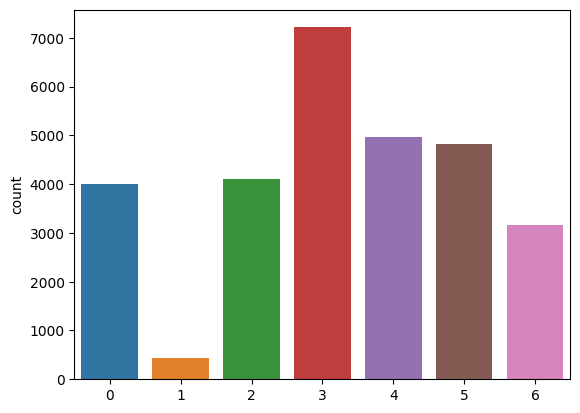

In [ ]:
sns.countplot(x = train_dataset.classes)

Teszt adathalmaz létrehozása

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/dataset/test', target_size=(48,48), batch_size=1, class_mode='categorical', shuffle=False)

Found 7178 images belonging to 7 classes.


In [ ]:
with open('/content/drive/MyDrive/Diplomamunka/Weights/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_8_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_8", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/Diplomamunka/Weights/weights_emotions.hdf5')
network_loaded.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
network_loaded.evaluate(test_dataset)

7178/7178 [==============================] - 95s 13ms/step - loss: 0.9665 - accuracy: 0.6705


[0.9664714336395264, 0.6705210208892822]

In [ ]:
predictions = network_loaded.predict(test_dataset)
predictions

7178/7178 [==============================] - 100s 14ms/step


array([[9.64336157e-01, 1.34740694e-04, 9.90682933e-03, ...,
        1.39558467e-03, 1.26355989e-02, 5.94253549e-07],
       [9.84767139e-01, 1.10871006e-04, 4.56703594e-03, ...,
        2.16436456e-03, 3.80269205e-03, 1.54630383e-04],
       [3.39132082e-03, 9.22743129e-05, 1.12565145e-01, ...,
        7.30817160e-03, 8.69418502e-01, 5.68260613e-04],
       ...,
       [1.43412733e-04, 1.76773753e-07, 4.93074651e-04, ...,
        4.18692362e-04, 3.42566142e-04, 9.98579144e-01],
       [3.60350125e-04, 2.03414311e-06, 2.06352491e-03, ...,
        2.30088714e-03, 8.00798647e-04, 9.94235933e-01],
       [1.51278805e-02, 2.14123465e-05, 8.35195184e-03, ...,
        3.30921076e-03, 1.14564062e-03, 9.61003125e-01]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 5, ..., 6, 6, 6])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'A modell precíziója: {int(round(accuracy_score(test_dataset.classes, predictions),2) * 100 ) }%')

A modell precíziója: 67%


A modell konfúziós mátrixa

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[ 552,   14,   99,   35,  128,  116,   14],
       [  23,   70,    4,    2,    5,    7,    0],
       [  94,    4,  473,   35,  165,  181,   72],
       [  25,    3,   33, 1552,  106,   29,   26],
       [  63,    3,   51,   71,  870,  162,   13],
       [ 100,    2,  107,   52,  300,  669,   17],
       [  13,    3,  100,   42,   31,   15,  627]])

A konfúziós mátrix ábrázolva

<Axes: >

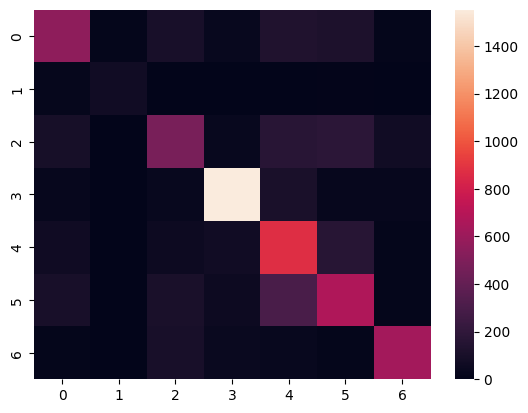

In [ ]:
sns.heatmap(cm, annot=False)

In [ ]:
test_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       958
           1       0.71      0.63      0.67       111
           2       0.55      0.46      0.50      1024
           3       0.87      0.87      0.87      1774
           4       0.54      0.71      0.61      1233
           5       0.57      0.54      0.55      1247
           6       0.82      0.75      0.78       831

    accuracy                           0.67      7178
   macro avg       0.67      0.65      0.66      7178
weighted avg       0.67      0.67      0.67      7178



In [ ]:
detector = cv2.CascadeClassifier('/content/drive/MyDrive/Diplomamunka/Cascades/cascade_2.xml')

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Diplomamunka/Videos/emotion_test05.mp4')
connected , video = cap.read()
print(connected, video.shape)

True (480, 854, 3)


In [ ]:
save_path = '/content/drive/MyDrive/Diplomamunka/Videos/emotion_test05_MY_RESULT.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0] ))

In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
draw_rect_h = 140
draw_rect_w = 60
happy_st_pt = (600,600)

rect_dim = (60,140)
thickness = 3
color_valid = (255,0,0)
color_invalid = (0,0,255)

In [ ]:
while (cv2.waitKey(1) < 0):
  connected, frame = cap.read()
  if not connected:
    break
  faces = detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=8, minSize=(50,50))
  if len(faces) > 0:
    for(x_position, y_position, width, height) in faces:
      frame = cv2.rectangle(frame, (x_position, y_position), (x_position + width, y_position + height), (0,255,0), 1 )
      roi = frame[y_position:y_position + height, x_position:x_position + width]
      roi = cv2.resize(roi, (48,48))
      roi = roi / 255
      roi = np.expand_dims(roi, axis=0)
      #print(roi.shape)
      prediction = network_loaded.predict(roi)
      print(prediction)

      if prediction is not None:
        result = np.argmax(prediction)
        cv2.putText(frame, emotions[result], (x_position, y_position-3), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0, 255, 0), 1, cv2.LINE_AA )
  cv2_imshow(frame)
  output_video.write(frame)

print('end')
output_video.release()
cv2.destroyAllWindows()